## 1. Load the Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("improved_disease_dataset.csv")
df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)


## 2. Define the objective
### What do we want to predict?
We want to predict the disease of the patient based on their symptoms
### Is it a classification or regression problem?
Multi-class classification problem

## 3. Exploratory data analysis (EDA)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fever        2000 non-null   int64 
 1   headache     2000 non-null   int64 
 2   nausea       2000 non-null   int64 
 3   vomiting     2000 non-null   int64 
 4   fatigue      2000 non-null   int64 
 5   joint_pain   2000 non-null   int64 
 6   skin_rash    2000 non-null   int64 
 7   cough        2000 non-null   int64 
 8   weight_loss  2000 non-null   int64 
 9   yellow_eyes  2000 non-null   int64 
 10  disease      2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB


In [9]:
df.describe()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.328000,0.413000,0.378500,0.526000,0.365500,0.450500,0.387000,0.55500,0.456000,0.449000
std,0.469602,0.492496,0.485134,0.499448,0.481691,0.497668,0.487185,0.49709,0.498185,0.497517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
df.isnull().sum()

fever          0
headache       0
nausea         0
vomiting       0
fatigue        0
joint_pain     0
skin_rash      0
cough          0
weight_loss    0
yellow_eyes    0
disease        0
dtype: int64

In [11]:
df.duplicated().sum()

568

In [12]:
df = df.drop_duplicates()
df.duplicated().sum()

0

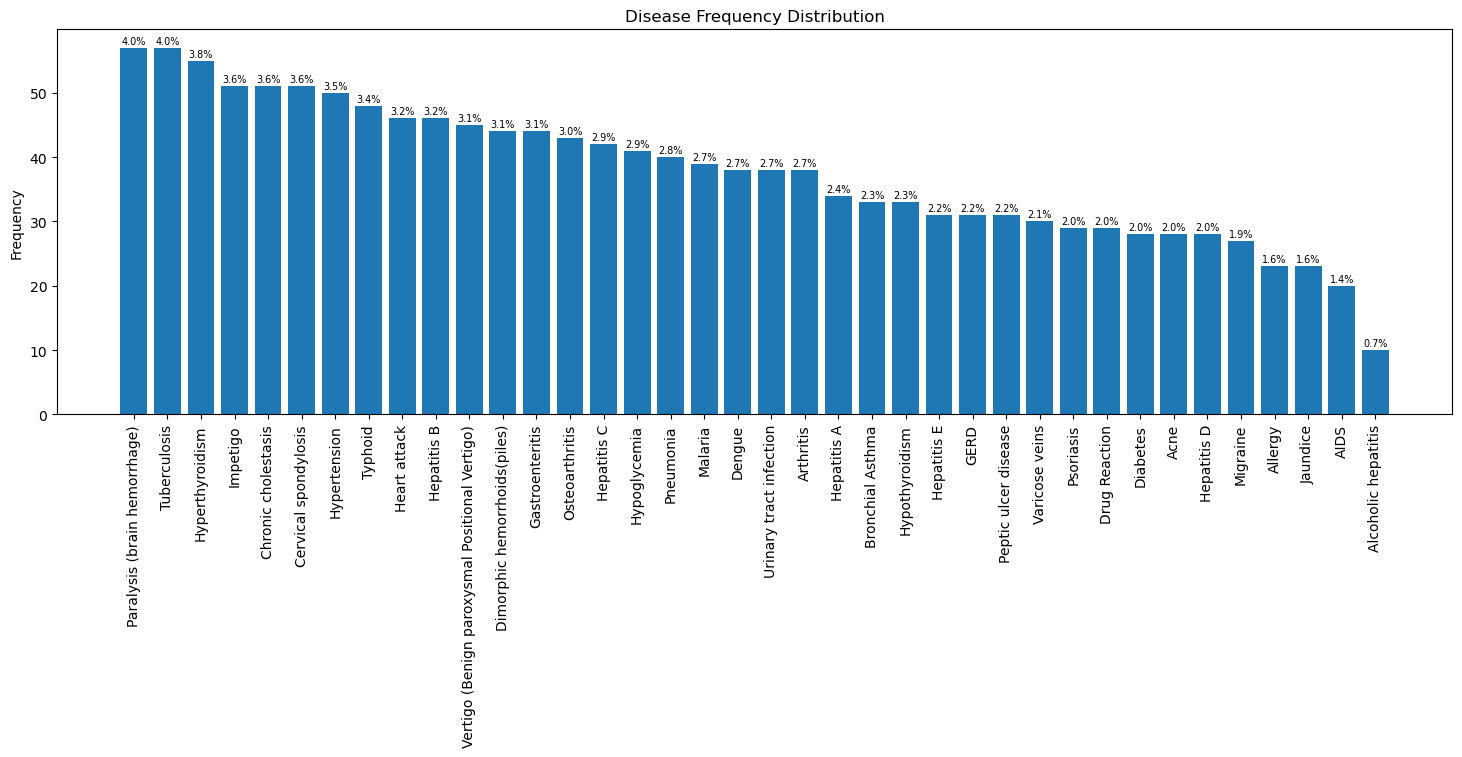

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

disease_counts = df['disease'].value_counts()
percentages = (disease_counts / disease_counts.sum()) * 100

bars = plt.bar(disease_counts.index, disease_counts.values, width=0.8)

for idx, bar in enumerate(bars):
    height = bar.get_height() + 0.3
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{percentages.iloc[idx]:.1f}%',
        ha='center',
        va='bottom',
        fontsize=7,
        color='black'
    )

plt.title('Disease Frequency Distribution')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.show()

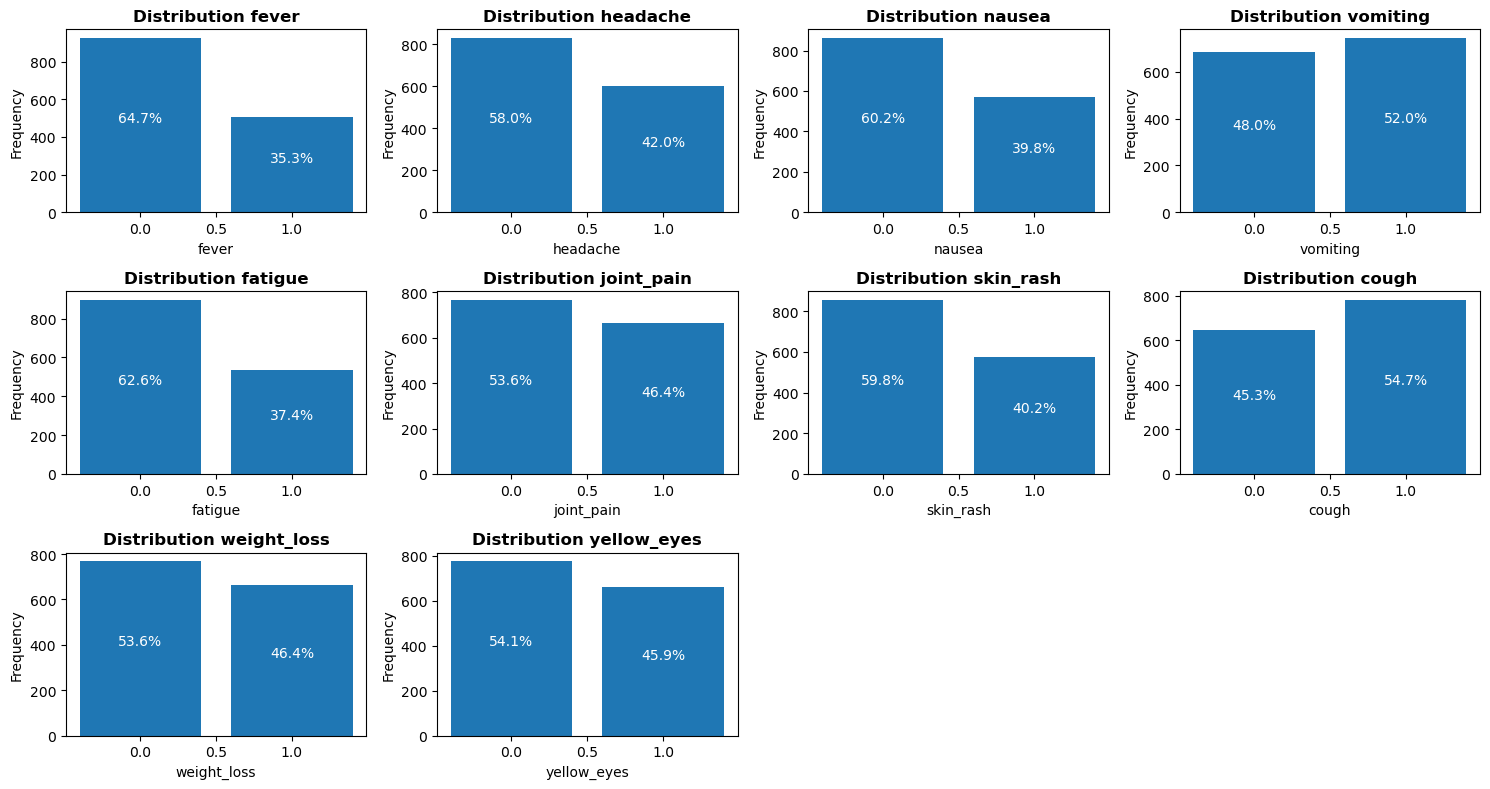

In [14]:
plt.figure(figsize=(15,8))

columns = df.drop('disease', axis=1).columns

for i, c in enumerate(columns):

    plt.subplot(3, 4, i+1)
    
    # Get value counts and compute percentages
    counts = df[c].value_counts()
    total = counts.sum()
    percentages = counts / total * 100

    # Plot the bar chart
    bars = plt.bar(counts.index, counts.values)

    # Add percentage labels on top of each bar
    for idx, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height/2,
                 f'{percentages.iloc[idx]:.1f}%', ha='center', va='bottom', fontsize=10, color = 'white')

    plt.title(f'Distribution {c}', fontweight='bold')
    plt.xlabel(c)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


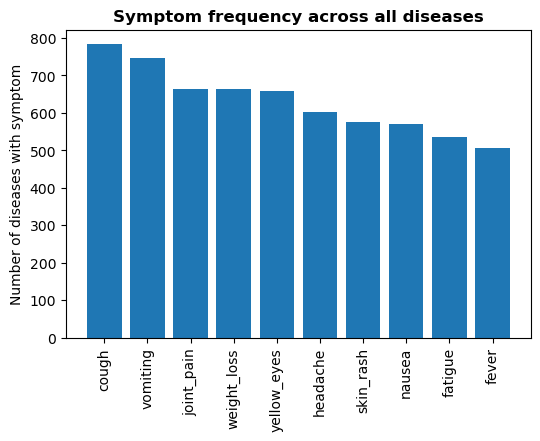

In [15]:
plt.figure(figsize=(6,4))

symptom_cols = df.columns.drop('disease')
symptom_counts = df[symptom_cols].sum().sort_values(ascending=False)

plt.bar(symptom_counts.index, symptom_counts.values)
plt.title('Symptom frequency across all diseases', fontweight='bold')
plt.ylabel('Number of diseases with symptom')
plt.xticks(rotation=90)
plt.show()


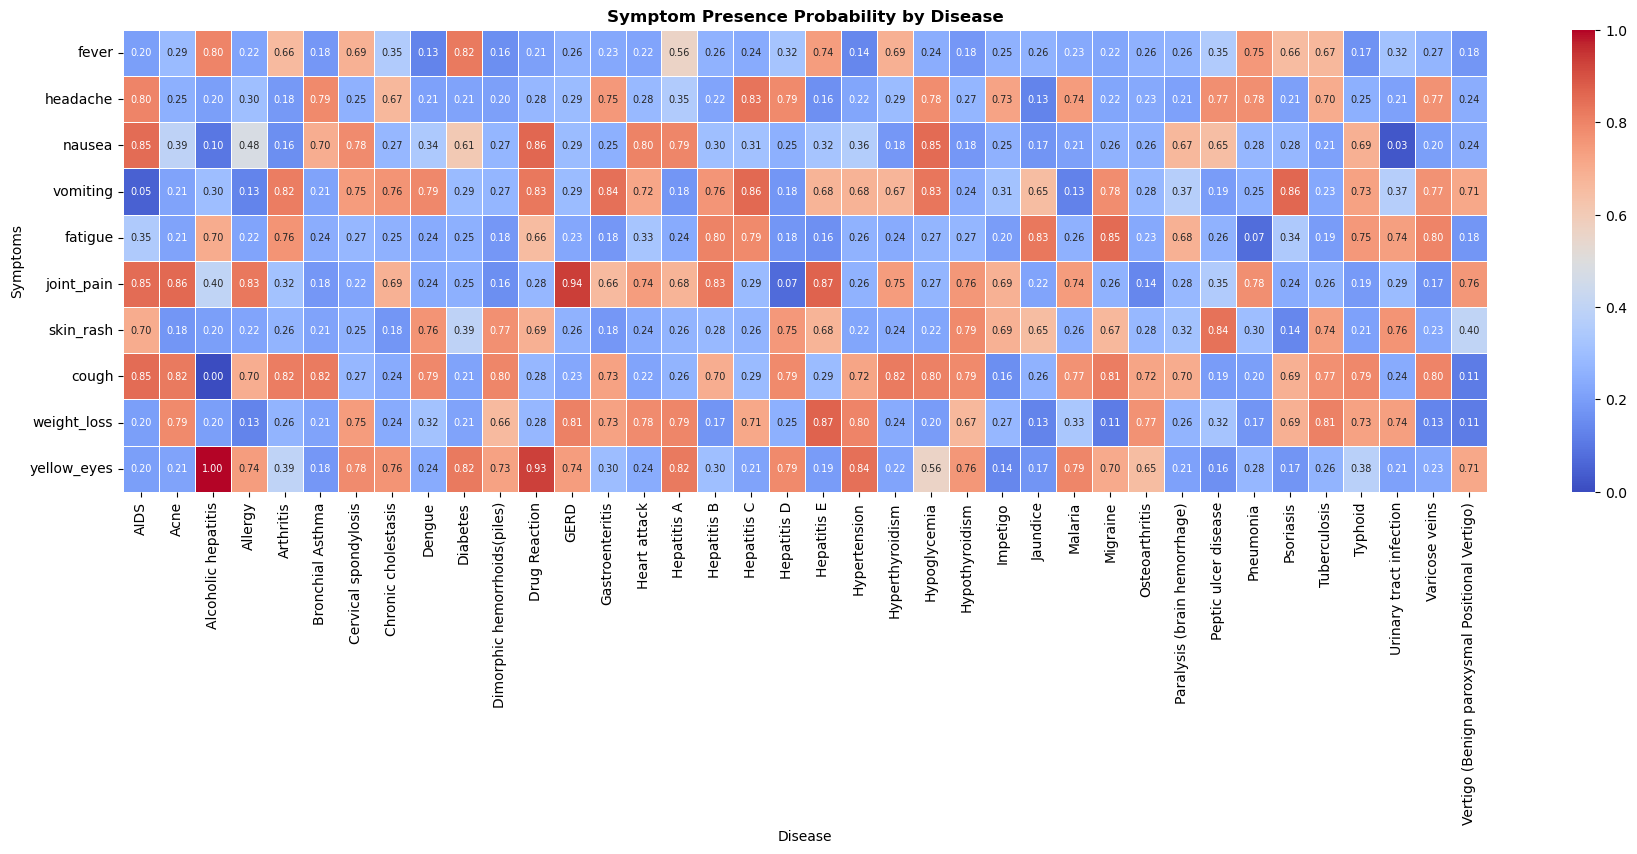

In [16]:
plt.figure(figsize=(22,6))

symptom_freq = df.groupby('disease').mean()

sns.heatmap(symptom_freq.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 7})
plt.title('Symptom Presence Probability by Disease', fontweight='bold')
plt.ylabel('Symptoms')
plt.xlabel('Disease')
plt.show()

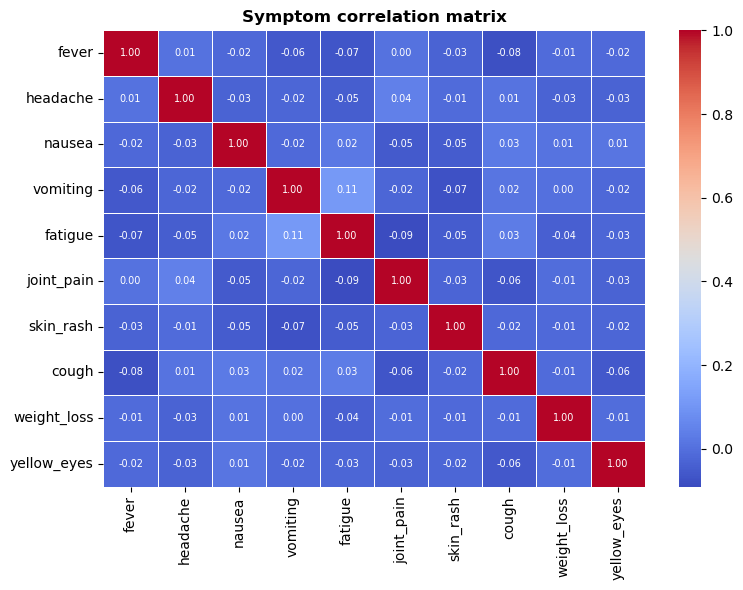

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df[symptom_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 7})
plt.title('Symptom correlation matrix', fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Feature Engineering

**Check for Redundant Features**

We have seen in the EDA that some symptoms are more common (cough, vomiting) than others (fatigue, fever), but all are important. Furthermore, no multicollinearity was observed.

**Encoding the Target Variable**

Let's convert our categorical labels (disease names) into numbers, so that they can be used as the target variable in machine learning models.

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['disease_encoded'] = le.fit_transform(df['disease'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
label_mapping

{'AIDS': 0,
 'Acne': 1,
 'Alcoholic hepatitis': 2,
 'Allergy': 3,
 'Arthritis': 4,
 'Bronchial Asthma': 5,
 'Cervical spondylosis': 6,
 'Chronic cholestasis': 7,
 'Dengue': 8,
 'Diabetes': 9,
 'Dimorphic hemorrhoids(piles)': 10,
 'Drug Reaction': 11,
 'GERD': 12,
 'Gastroenteritis': 13,
 'Heart attack': 14,
 'Hepatitis A': 15,
 'Hepatitis B': 16,
 'Hepatitis C': 17,
 'Hepatitis D': 18,
 'Hepatitis E': 19,
 'Hypertension': 20,
 'Hyperthyroidism': 21,
 'Hypoglycemia': 22,
 'Hypothyroidism': 23,
 'Impetigo': 24,
 'Jaundice': 25,
 'Malaria': 26,
 'Migraine': 27,
 'Osteoarthritis': 28,
 'Paralysis (brain hemorrhage)': 29,
 'Peptic ulcer disease': 30,
 'Pneumonia': 31,
 'Psoriasis': 32,
 'Tuberculosis': 33,
 'Typhoid': 34,
 'Urinary tract infection': 35,
 'Varicose veins': 36,
 'Vertigo (Benign paroxysmal Positional Vertigo)': 37}

**Class Balancing**

Let's first split the dataset into training and testing sets. We use stratify = y to ensure that the train and test sets have the same class distribution as the original dataset. This is important because we have many disease classes, some quite rare. Without stratification, those rare diseases might not appear in the test set, making evaluation unreliable.

After splitting the data, we apply SMOTE to address the class imbalance. 

In [21]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['disease', 'disease_encoded'])
y = df['disease_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**Feature Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## 5. Choose, train and evaluate the Model

**Model: Logistic Regression**

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

lr_model = LogisticRegression(
    multi_class='multinomial',  # good for multiclass problems
    max_iter=1000,              # increase if convergence warning appears
    random_state=42
)

lr_model.fit(X_train_scaled, y_train_resampled)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate performance
train_accuracy_lr = accuracy_score(y_train_resampled, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print(f"Logistic Regression -> Training Accuracy: {train_accuracy_lr:.2f}")
print(f"Logistic Regression -> Test Accuracy: {test_accuracy_lr:.2f}")

precision_lr = precision_score(y_test, y_test_pred_lr, average='macro')
print(f"Logistic Regression -> Precision: {precision_lr:.2f}")

recall_lr = recall_score(y_test, y_test_pred_lr, average='macro')
print(f"Logistic Regression -> Recall: {recall_lr:.2f}")

f1_lr = f1_score(y_test, y_test_pred_lr, average='macro')
print(f"Logistic Regression -> F1-score: {f1_lr:.2f}")

Logistic Regression -> Training Accuracy: 0.40
Logistic Regression -> Test Accuracy: 0.23
Logistic Regression -> Precision: 0.25
Logistic Regression -> Recall: 0.25
Logistic Regression -> F1-score: 0.23


**Model: Random Forest**

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=3,
    class_weight='balanced_subsample',
    random_state=42
)

rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_train_pred_rf = rf_model.predict(X_train_resampled)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate performance
train_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest -> Training Accuracy: {train_accuracy_rf:.2f}")
print(f"Random Forest -> Test Accuracy: {test_accuracy_rf:.2f}")

precision_rf = precision_score(y_test, y_test_pred_rf, average='macro')
print(f"Random Forest -> Precision: {precision_rf:.2f}")

recall_rf = recall_score(y_test, y_test_pred_rf, average='macro')
print(f"Random Forest -> Recall: {recall_rf:.2f}")

f1_rf = f1_score(y_test, y_test_pred_rf, average='macro')
print(f"Random Forest -> F1-score: {f1_rf:.2f}")

Random Forest -> Training Accuracy: 0.58
Random Forest -> Test Accuracy: 0.12
Random Forest -> Precision: 0.12
Random Forest -> Recall: 0.14
Random Forest -> F1-score: 0.12


**Model: SVM (Support Vector Machines)**

In [98]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train_resampled)

# Predictions
y_train_pred_svm = svm_model.predict(X_train_scaled)
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate performance
train_accuracy_svm = accuracy_score(y_train_resampled, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print(f"SVM -> Training Accuracy: {train_accuracy_svm:.2f}")
print(f"SVM -> Test Accuracy: {test_accuracy_svm:.2f}")

precision_svm = precision_score(y_test, y_test_pred_svm, average='macro')
print(f"SVM -> Precision: {precision_svm:.2f}")

recall_svm = recall_score(y_test, y_test_pred_svm, average='macro')
print(f"SVM -> Recall: {recall_svm:.2f}")

f1_svm = f1_score(y_test, y_test_pred_svm, average='macro')
print(f"SVM -> F1-score: {f1_svm:.2f}")

SVM -> Training Accuracy: 0.51
SVM -> Test Accuracy: 0.18
SVM -> Precision: 0.19
SVM -> Recall: 0.19
SVM -> F1-score: 0.18


**Model: Naive Bayes**

In [87]:
from sklearn.naive_bayes import MultinomialNB

# Not scaled values needed
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_train_pred_nb = nb_model.predict(X_train_resampled)
y_test_pred_nb = nb_model.predict(X_test)

# Evaluate performance
train_accuracy_nb = accuracy_score(y_train_resampled, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)

print(f"Naive Bayes -> Training Accuracy: {train_accuracy_nb:.2f}")
print(f"Naive Bayesn -> Test Accuracy: {test_accuracy_nb:.2f}")

precision_nb = precision_score(y_test, y_test_pred_nb, average='macro')
print(f"Naive Bayes -> Precision: {precision_nb:.2f}")

recall_nb = recall_score(y_test, y_test_pred_nb, average='macro')
print(f"Naive Bayes -> Recall: {recall_nb:.2f}")

f1_nb = f1_score(y_test, y_test_pred_nb, average='macro')
print(f"Naive Bayes -> F1-score: {f1_nb:.2f}")

Naive Bayes -> Training Accuracy: 0.38
Naive Bayesn -> Test Accuracy: 0.21
Naive Bayes -> Precision: 0.22
Naive Bayes -> Recall: 0.22
Naive Bayes -> F1-score: 0.20


**Model: XGBoost**

In [90]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softmax',  # For multiclass classification
    num_class=len(le.classes_),  # Number of classes in your target
    eval_metric='mlogloss',     # Multiclass log loss
    use_label_encoder=False,
    random_state=42
)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_train_pred_xgb = xgb_model.predict(X_train_resampled)
y_test_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
train_accuracy_xgb = accuracy_score(y_train_resampled, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

print(f"XGBoost -> Training Accuracy: {train_accuracy_xgb:.2f}")
print(f"XGBoost -> Test Accuracy: {test_accuracy_xgb:.2f}")

precision_xgb = precision_score(y_test, y_test_pred_xgb, average='macro')
print(f"XGBoost -> Precision: {precision_xgb:.2f}")

recall_xgb = recall_score(y_test, y_test_pred_xgb, average='macro')
print(f"XGBoost -> Recall: {recall_xgb:.2f}")

f1_xgb = f1_score(y_test, y_test_pred_xgb, average='macro')
print(f"XGBoost -> F1-score: {f1_xgb:.2f}")

C:\Users\F89164c\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:51:09] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost -> Training Accuracy: 0.62
XGBoost -> Test Accuracy: 0.09
XGBoost -> Precision: 0.10
XGBoost -> Recall: 0.11
XGBoost -> F1-score: 0.10
